## Introduction:

Reference: https://www.geeksforgeeks.org/regression-classification-supervised-machine-learning/

## 1. Simple Linear Regression:

In [1]:
## data manipulation
import numpy as np
import pandas as pd

## plotting .. 
import seaborn as sns

import matplotlib.pyplot as plt  #plotting 


from sklearn import datasets, linear_model  #ML model
from sklearn.model_selection import train_test_split #data split
from sklearn.metrics import mean_squared_error #model evaluation

## Feature selection 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

## chaining opertator in R %>% a 
%matplotlib inline

## warnings
import warnings
warnings.filterwarnings("ignore")

In [132]:
df = pd.read_csv("Housing-LR.csv", header = 0) 

In [133]:
df.head()

,lotsize,bedrooms,bathrms,stories,driveway,gardenarea,fullbase,gashw,airco,garagepl,prefarea,price
0,5850,3,1,2,yes,2177,yes,no,no,1,no,42000.0
1,4000,2,1,1,yes,6705,no,no,no,0,no,38500.0
2,3060,3,1,1,yes,1168,no,no,no,0,no,49500.0
3,6650,3,1,2,yes,8850,no,no,no,0,no,60500.0
4,6360,2,1,1,yes,9670,no,no,no,0,no,61000.0


In [134]:
np.shape(df)

(546, 12)

In [135]:
df.isnull().any()

lotsize       False
bedrooms      False
bathrms       False
stories       False
driveway      False
gardenarea    False
fullbase      False
gashw         False
airco         False
garagepl      False
prefarea      False
price         False
dtype: bool

In [136]:
df.isnull().sum()

lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
gardenarea    0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
price         0
dtype: int64

In [139]:
#x is the input vector 
x = df[['lotsize', 'gardenarea']]  #should be continuous variable 
x.head() 

,lotsize,gardenarea
0,5850,2177
1,4000,6705
2,3060,1168
3,6650,8850
4,6360,9670


Text(0.5, 1.0, 'Price Histogram')

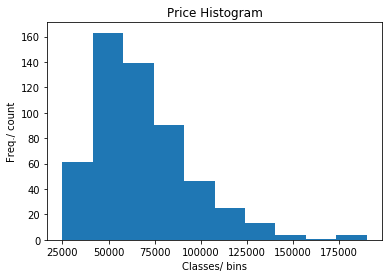

In [138]:
plt.hist(df['price'])
plt.xlabel('Classes/ bins')
plt.ylabel('Freq./ count')
plt.title('Price Histogram')

{'whiskers': [<matplotlib.lines.Line2D at 0x2b7e0b322b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b7e0b32940>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b7e0b32160>],
 'medians': [<matplotlib.lines.Line2D at 0x2b7e0b32fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b7e0b3d358>],
 'means': []}

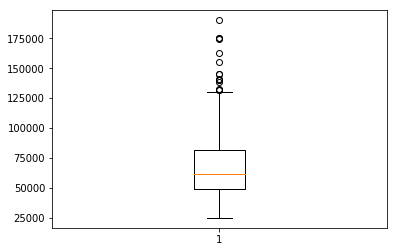

In [137]:
plt.boxplot(df['price'])

In [140]:
type(x)

pandas.core.frame.DataFrame

In [141]:
x = x.values.reshape(len(x), 2)  #mandate for fitting the model 
x

array([[5850, 2177],
       [4000, 6705],
       [3060, 1168],
       ...,
       [6000, 3171],
       [6000, 2778],
       [6000, 2019]], dtype=int64)

In [142]:
y = df['price'] #dependent variable
y.head()

0    42000.0
1    38500.0
2    49500.0
3    60500.0
4    61000.0
Name: price, dtype: float64

In [143]:
y = y.values.reshape(len(y), 1)
y

array([[ 42000.],
       [ 38500.],
       [ 49500.],
       [ 60500.],
       [ 61000.],
       [ 66000.],
       [ 66000.],
       [ 69000.],
       [ 83800.],
       [ 88500.],
       [ 90000.],
       [ 30500.],
       [ 27000.],
       [ 36000.],
       [ 37000.],
       [ 37900.],
       [ 40500.],
       [ 40750.],
       [ 45000.],
       [ 45000.],
       [ 48500.],
       [ 65900.],
       [ 37900.],
       [ 38000.],
       [ 42000.],
       [ 42300.],
       [ 43500.],
       [ 44000.],
       [ 44500.],
       [ 44900.],
       [ 45000.],
       [ 48000.],
       [ 49000.],
       [ 51500.],
       [ 61000.],
       [ 61000.],
       [ 61700.],
       [ 67000.],
       [ 82000.],
       [ 54500.],
       [ 66500.],
       [ 70000.],
       [ 82000.],
       [ 92000.],
       [ 38000.],
       [ 44000.],
       [ 41000.],
       [ 43000.],
       [ 48000.],
       [ 54800.],
       [ 55000.],
       [ 57000.],
       [ 68000.],
       [ 95000.],
       [ 38000.],
       [ 2

### split the data into train and test .. 

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)  #split data 80, 20 

In [145]:
np.shape(x_train), np.shape(y_train)

((436, 2), (436, 1))

In [ ]:
# Plot outputs 
plt.scatter(x_train, y_train,  color = 'blue') 
plt.title('Train Data') 
plt.xlabel('Bedrooms') 
plt.ylabel('Price') 

## Feature Selection:

https://scikit-learn.org/stable/modules/feature_selection.html

In [147]:
clf = ExtraTreesClassifier(n_estimators=50)

In [158]:
clf.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [151]:
clf.feature_importances_  ## The number of trees in the forest (default = 10)

array([0.46876407, 0.53123593])

Now we are aware of the importance of each feature! 

In [152]:
model = SelectFromModel(clf, prefit=True)
model

SelectFromModel(estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=True, threshold=None)

In [153]:
model.transform(x_train)

array([[1360],
       [1256],
       [1068],
       [2021],
       [3236],
       [3644],
       [2299],
       [6949],
       [8554],
       [3345],
       [5527],
       [8613],
       [1759],
       [7638],
       [9066],
       [8317],
       [8175],
       [3877],
       [1430],
       [5249],
       [8195],
       [5916],
       [4213],
       [2585],
       [8518],
       [8812],
       [6891],
       [7281],
       [9039],
       [6559],
       [2496],
       [2787],
       [4759],
       [6780],
       [2273],
       [3610],
       [1137],
       [6664],
       [3982],
       [2177],
       [2295],
       [3521],
       [4029],
       [8583],
       [4845],
       [3348],
       [8773],
       [2224],
       [6617],
       [6414],
       [4050],
       [9524],
       [8192],
       [9994],
       [9467],
       [4286],
       [4854],
       [5454],
       [7643],
       [8371],
       [7940],
       [5867],
       [8203],
       [4152],
       [7831],
       [5366],
       [73

## Modeling Phase:
Building a linear regression model .. 

In [154]:
# Create linear regression object 
regr = linear_model.LinearRegression() 
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
# Train the model using the training sets 
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
plt.scatter(x_train, y_train)

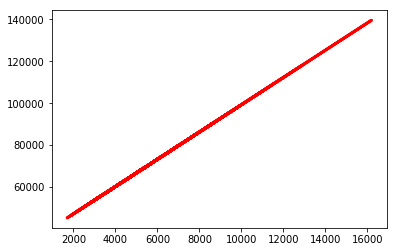

In [96]:
## testing the model
plt.plot(x_test, regr.predict(x_test), color='red',linewidth=3) ##x_test vs predicted values using x_test

## Do it yourself :) 
Try to apply multiple linear regression by choosing multiple independent variables

## Model Evaluation:
Calculating the error .. 

In [60]:
# error between y_actual and y_predicted
y_predicted = regr.predict(x_test)
mean_squared_error(y_test, y_predicted)  #for every single point 

433638972.81468874

mmmm huge number ! .. 

It seems that linear model is not the best option ! .. 

Let's practice a non-linear one in another Notebook ;)